#Importing necessary libraries

In [ ]:
import statsmodels.formula.api as sm

import pandas as pd       #data processing
import numpy as np        #linear algebra
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
#from haversine import haversine
#import statsmodels.formula.api as sm

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

In [ ]:
#Importing the Dataset
df=pd.read_csv('/content/nyc_taxi_trip_duration.csv')

In [ ]:
#Exploring the Dataset
df.shape

(729322, 11)

In [ ]:
df.columns #columns names

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.dtypes #columns datatypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
df.head() #visualizing first 5 rows of data set

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [ ]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [ ]:
np.sum(pd.isnull(df)) #checking for null values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


Only 1 row with Null Values in Drop Co=ordinates, Trip Duration and Flag. 

In [ ]:
df=df.dropna().reset_index(drop=True) #deleting the NaN row and Reset index after drop

In [ ]:
np.sum(pd.isnull(df)) #Rechecking for Null Values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Now There are no Null Values in Data Set

In [ ]:
df.nunique()  #Checking Unique Values in Columns

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

729322 unique id, 2 unique vendor_ids, 8 unique passenger_count, 2 unique values for store_and_fwd_flag (Y/N)

In [ ]:
df.describe() #Statistical summary of the dataset.

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


There are 2 vendors, There are trips with no passengers. There are trips of very low duration.

Feature Creation

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

df['pickup_day']=df['pickup_datetime'].dt.day_name() #Day by Name
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()#Day by Name
df['pickup_day_no']=df['pickup_datetime'].dt.weekday #Days in Number
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday#Days in Number
df['pickup_hour']=df['pickup_datetime'].dt.hour #24 Hours Format
df['dropoff_hour']=df['dropoff_datetime'].dt.hour#24 Hours Format
df['pickup_month']=df['pickup_datetime'].dt.month #Month in Numbers
df['dropoff_month']=df['dropoff_datetime'].dt.month#Month in Numbers


Dividing day into 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [ ]:
def time_of_day(x): #defining a function
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day) #Creating Coulum pickup_timeofday
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day) #Creating Coulum dropoff_timeofday

Calculating Distance Using Co-ordinates

In [ ]:
from geopy.distance import great_circle # Importing library for calculating distance from geographical coordinates.

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long): #Defining a function to take coordinates as inputs and return us distance.
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km
#Creating the feature ‘distance’.
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

Calculating Speed

In [ ]:
#Calculate Speed in km/h for further insights
df['speed'] = (df.distance/(df.trip_duration/3600))

In [ ]:
df.head() #Displaying First 5 Rows for inspection of data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,0,16,16,2,2,Evening,Evening,1.199074,10.791669
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,4,4,23,23,3,3,Late night,Late night,4.129117,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,6,6,17,18,2,2,Evening,Evening,7.250763,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,1,9,10,1,1,Morning,Morning,2.361101,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,2,6,6,2,2,Morning,Morning,4.328540,18.375877


Dummy

In [ ]:
#Convert timestamp to datetime format to fetch the other details as listed below
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
df['weekday'] = df.pickup_datetime.dt.day_name()
df['month'] = df.pickup_datetime.dt.month
df['weekday_num'] = df.pickup_datetime.dt.weekday
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [ ]:
#Dummify all the categorical features like "store_and_fwd_flag, vendor_id, month,
#weekday_num, pickup_hour, passenger_count" except the label i.e. "trip_duration"

dummy = pd.get_dummies(df.store_and_fwd_flag, prefix='flag')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.vendor_id, prefix='vendor_id')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.month, prefix='month')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.weekday_num, prefix='weekday_num')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.pickup_hour, prefix='pickup_hour')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.passenger_count, prefix='passenger_count')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

Univariate Analysis

Trip Duration Analysis

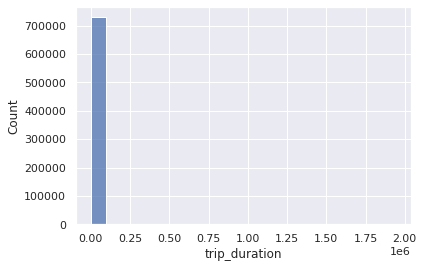

In [ ]:
sns.histplot(df['trip_duration'],kde=False,bins=20) #Histogram of Trip Duration


In [ ]:
print(df['trip_duration'].skew())  #Finding Trip Duration SKEW

186.6784368781186


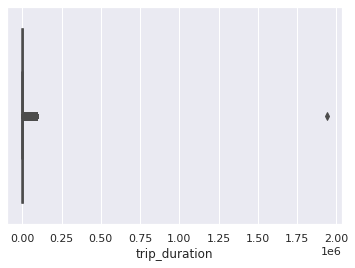

In [ ]:
#Box Plot of Trip Duration

sns.boxplot(df['trip_duration'])

In [ ]:
df['trip_duration'].describe()/3600 #summary statistics of the column trip_duration in hours

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

In [ ]:
#outlier Observed

#Sorting For Inspection
df['trip_duration'].sort_values(ascending=True)

296874          1
323299          1
622664          1
398887          1
312992          1
           ...   
496391      86377
177225      86378
119185      86387
259437      86391
21813     1939736
Name: trip_duration, Length: 729322, dtype: int64

In [ ]:
df['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [ ]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,max(df.trip_duration),3600))).count()


trip_duration
(1, 3601]             723253
(3601, 7201]            4964
(7201, 10801]             61
(10801, 14401]            15
(14401, 18001]             2
                       ...  
(1918801, 1922401]         0
(1922401, 1926001]         0
(1926001, 1929601]         0
(1929601, 1933201]         0
(1933201, 1936801]         0
Name: trip_duration, Length: 538, dtype: int64

#There are some trips with more than 24 hours of travel duration i.e. 86400 seconds. Which might have occured on weekends for the outstation travels.
#Major chunk of trips are completed within an interval of 1 hour with some good numbers of trips duration going above 1 hour.
#Let's look at those trips with huge duration, these are outliers and should be removed for the data consistency.

In [ ]:
#Dropping Rows having Trip Duration Outliers ( 1939736 and 1)
df.drop(df[df['trip_duration'] == 1939736].index, inplace = True)
df.drop(df[df['trip_duration'] == 1].index, inplace = True)

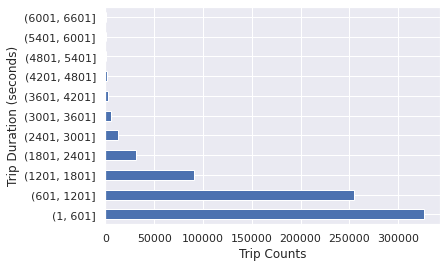

In [ ]:
#Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... minutes respectively
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

#We can observe that most of the trips took 0 - 30 mins to
#complete i.e. approx 1800 secs. Let's move ahead to next feature.

In [ ]:
#Calculating IQR for Trip Duration

Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

678.0


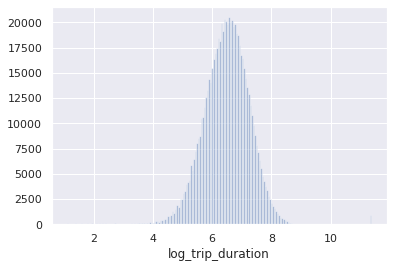

In [ ]:
#Normalization
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = False, bins = 200)
plt.show()

Vendor id Analysis

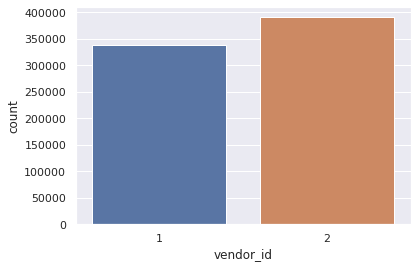

In [ ]:
sns.countplot(x='vendor_id',data=df)

#Less Variance Observed

Passenger Count Aalysis

In [ ]:
df.passenger_count.value_counts()

1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
7         1
9         1
Name: passenger_count, dtype: int64

In [ ]:
#Removing Trips With No Passengers (32) and Single Trips With 7 and 9 Passengers
df.drop(df[df['passenger_count'] == 0].index, inplace = True)
df.drop(df[df['passenger_count'] == 7].index, inplace = True)
df.drop(df[df['passenger_count'] == 9].index, inplace = True)

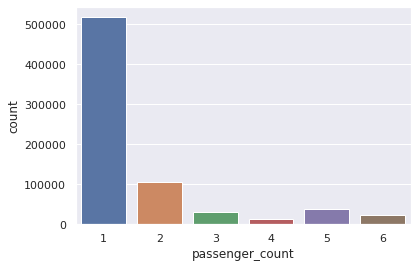

In [ ]:
sns.countplot(x='passenger_count',data=df) #Highest Trips With 1 Passenger

Store and Forward Flag Analysis

In [ ]:
df['store_and_fwd_flag'].value_counts(normalize=True) #Only about 0.5% were stored before forwarding

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday', 'distance',
       'speed', 'weekday', 'month', 'weekday_num', 'flag_Y', 'vendor_id_2',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'weekday_num_1',
       'weekday_num_2', 'weekday_num_3', 'weekday_num_4', 'weekday_num_5',
       'weekday_num_6', 'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3',
       'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7',
       'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11',
       'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15',
       'pickup_hour_16', 'pickup_hour_17', 'p

In [ ]:
#Checking Further
df.store_and_fwd_flag.value_counts()

N    725236
Y      4038
Name: store_and_fwd_flag, dtype: int64

In [ ]:
df.vendor_id[df.store_and_fwd_flag == 'Y'].value_counts()

1    4038
Name: vendor_id, dtype: int64

#Above result shows that all the offline trips were taken by vendor 1.
#We already know that vendor 2 has greater market share as compared to vendor 1.
#So, there can be two reasons for this scenario.

Distance Analysis

In [ ]:
df['distance'].value_counts() 

0.000000    2889
0.000424      20
0.000424      18
0.000424      18
0.000424      11
            ... 
0.977650       1
0.925223       1
4.112012       1
1.107789       1
5.945846       1
Name: distance, Length: 726212, dtype: int64

#There are 2889 trips with 0 km distance

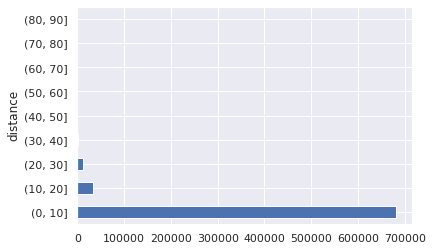

In [ ]:
df.distance.groupby(pd.cut(df.distance, np.arange(0,100,10))).count().plot(kind='barh')
plt.show()



#From the above observation it is evident that most of the rides are completed between
#1-10 Kms with some of the rides with distances between 10-30 kms. Other slabs bar are not visible
#because the number of trips are very less as compared to these slabs

Trips per Day Analysis

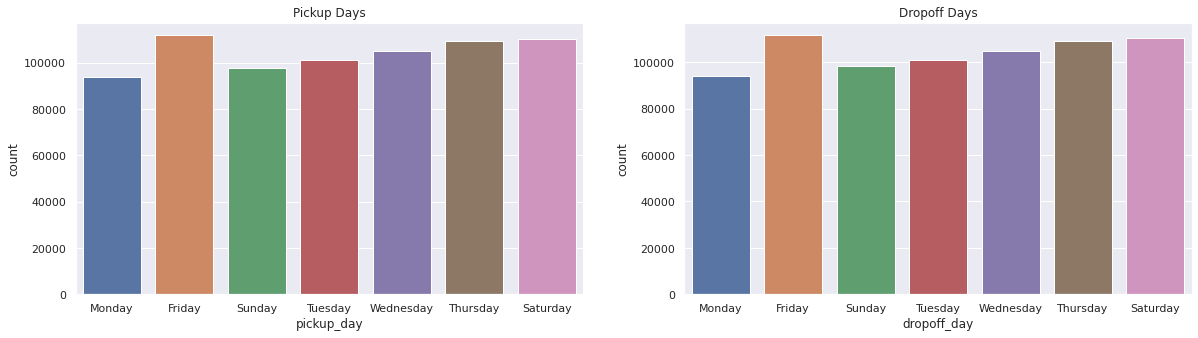

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

#Fridays are the busiest days followed by Saturdays

Trips per Hour Analysis

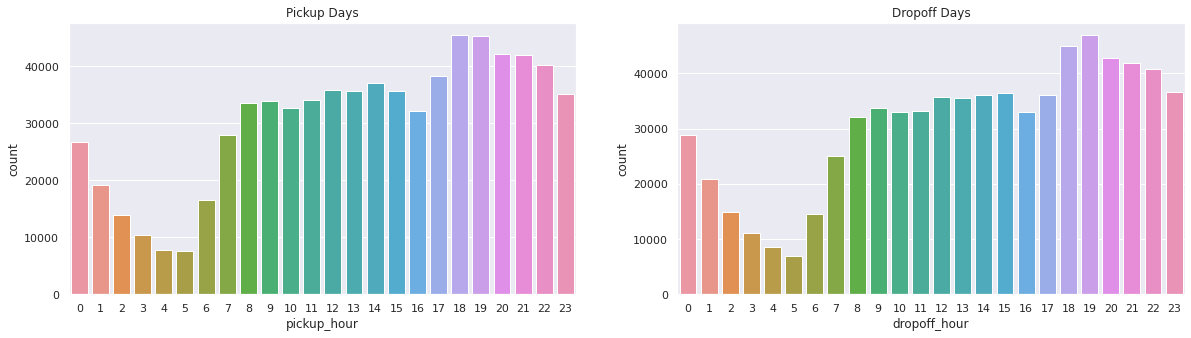

In [ ]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)



#The busiest hours are 6:00 pm to 7:00 pm

Trips per Time of Day Analysis

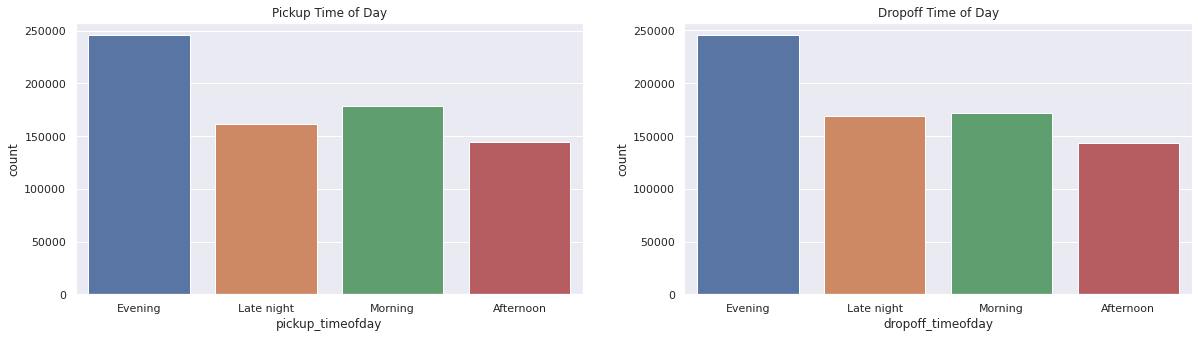

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)



#Evenings are the busiest

Total trips per weekday

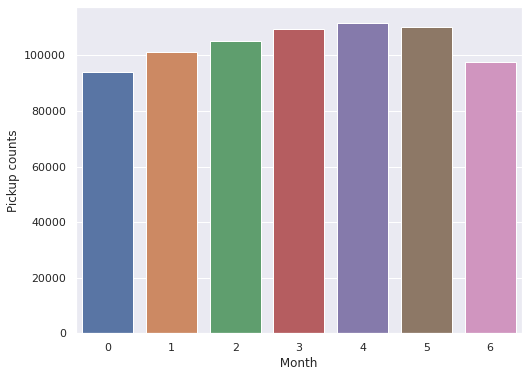

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(df.weekday_num)
plt.xlabel(' Month ')
plt.ylabel('Pickup counts')
plt.show()

#Here we can see an increasing trend of taxi pickups starting from Monday till Friday

Hourwise pickup pattern across the week

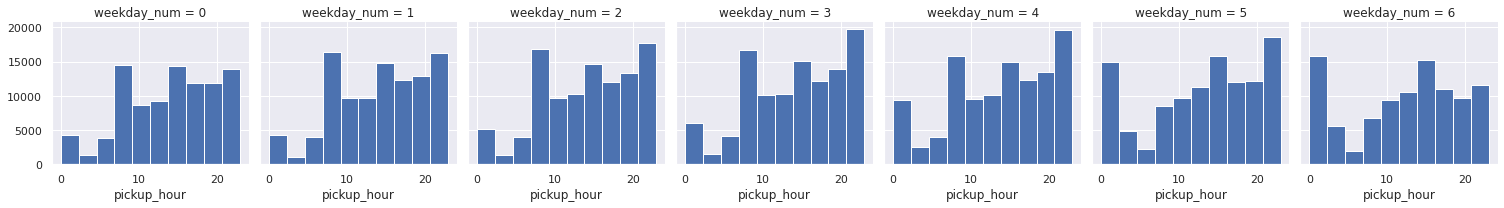

In [ ]:
n = sns.FacetGrid(df, col='weekday_num')
n.map(plt.hist, 'pickup_hour')
plt.show()

Trips per month Analysis

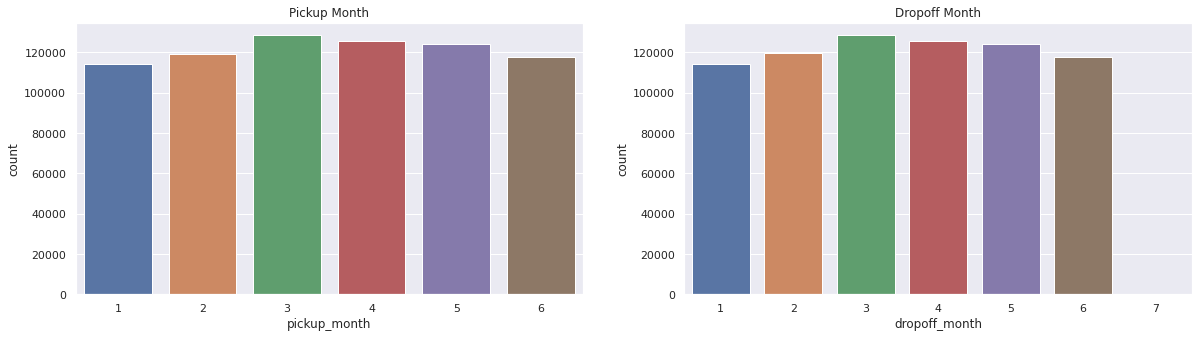

In [ ]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=df,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax12)

#There is not much difference in the number of trips across months

Speed Analysis

In [ ]:
df.speed.describe()

count    729274.000000
mean         14.420941
std          12.325793
min           0.000000
25%           9.124748
50%          12.797118
75%          17.844225
max        5640.501953
Name: speed, dtype: float64

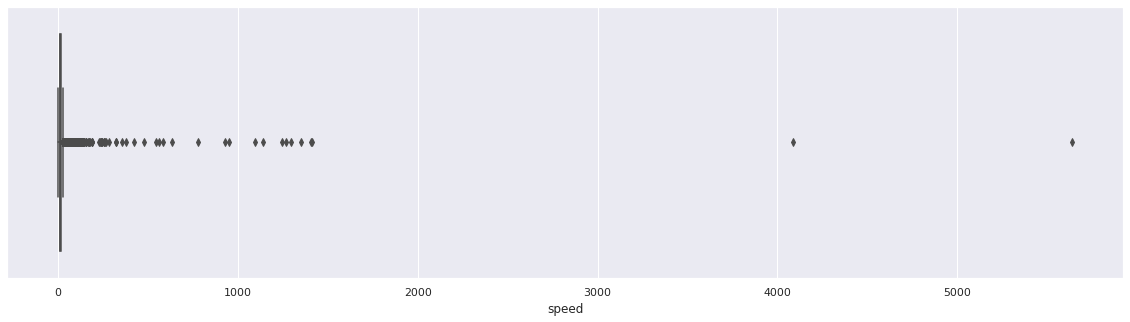

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df.speed)
plt.show()

#Many trips were done at a speed of over 200 km/h.

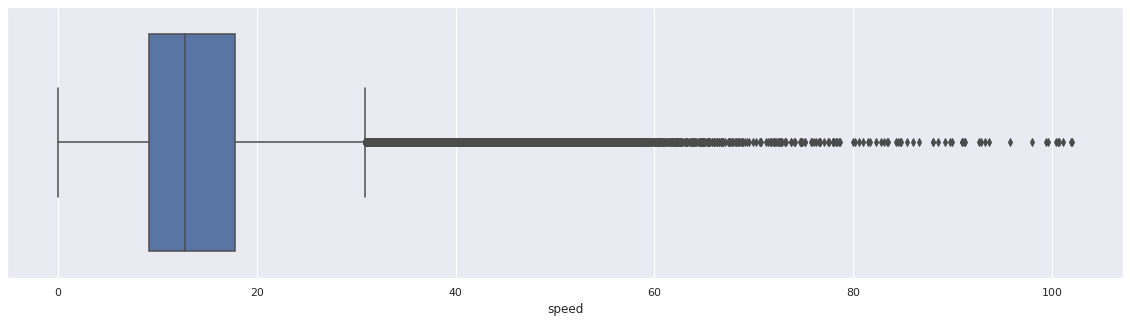

In [ ]:
#Box Plot Analysis of Speed Less than 104 Km/hr
df = df[df.speed <= 104]
plt.figure(figsize = (20,5))
sns.boxplot(df.speed)
plt.show()

#Trips over 30 km/h are being considered as outliers but we cannot
#ignore them because they are well under the highest speed limit of 104 km/h on state controlled highways.
#Mostly trips are done at a speed range of 10-20 km/h with an average speed of around 14 km/h.

Speed Range Ditribution

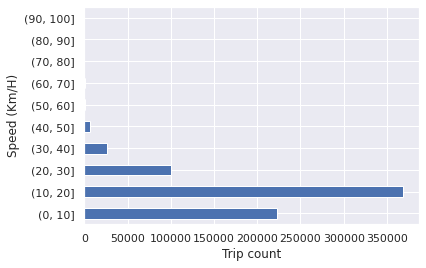

In [ ]:
df.speed.groupby(pd.cut(df.speed, np.arange(0,104,10))).count().plot(kind = 'barh')
plt.xlabel('Trip count')
plt.ylabel('Speed (Km/H)')
plt.show()

In [ ]:
#It is evident from this graph what we thought off earlier i.e.
#most of the trips were done at a speed range of 10-20 km/H.

Bivariate Analysis

Trip Duration per Vendor

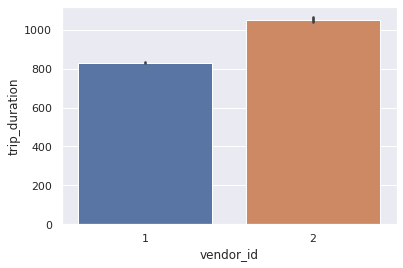

In [ ]:
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)

#Vendor id 2 takes longer trips as compared to vendor 1

Trip Duration per Store and Forward Flag Analysis

Trip Duration per passenger count Analysis

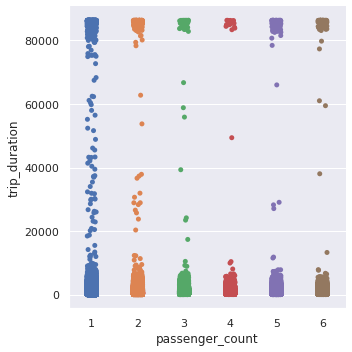

In [ ]:
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind='strip')

#There is no visible relation between trip duration and passenger count

Trip Duration per hour Analysis

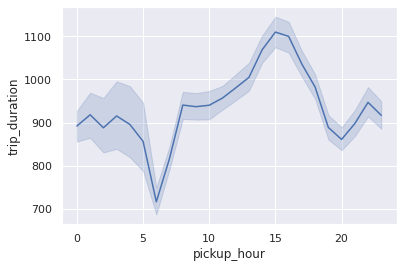

In [ ]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)



#The trip duration is the maximum around 3 pm.
#Trip duration is the lowest around 6 am.

Trip Duration per time of day Analysis

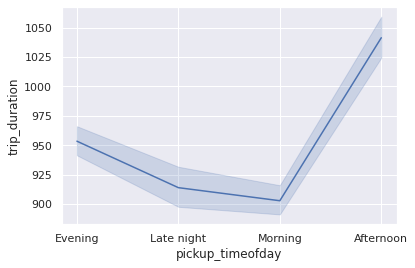

In [ ]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=df)

#Trip duration is the maximum in the afternoon and lowest between late night and morning

Trip Duration per Day of Week Analysis

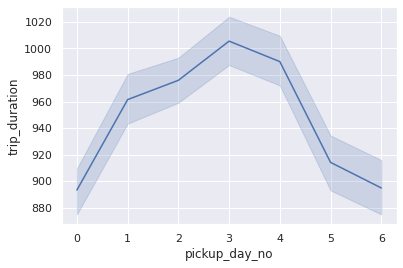

In [ ]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=df)


#Trip duration is the longest on Thursdays.

Trip Duration per month Analysis

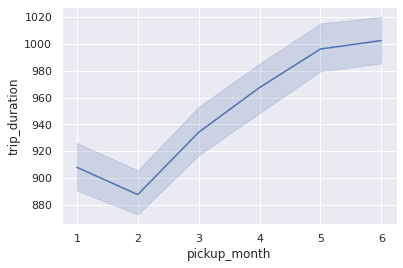

In [ ]:
sns.lineplot(x='pickup_month',y='trip_duration',data=df)

#From February, the trip duration rose every month

Distance and Vendor Analysis

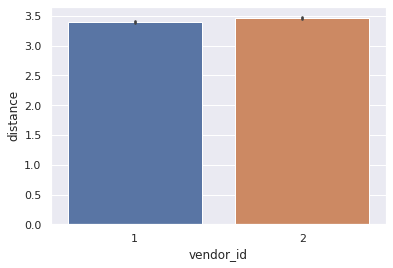

In [ ]:
sns.barplot(y='distance',x='vendor_id',data=df,estimator=np.mean)

#The distribution for both vendors is very similar

Distance and Store and Forward Flag Analysis

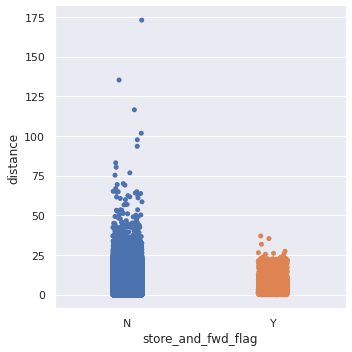

In [ ]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=df,kind="strip")

#For longer distances the trip is not stored

Distance v/s Trip duration

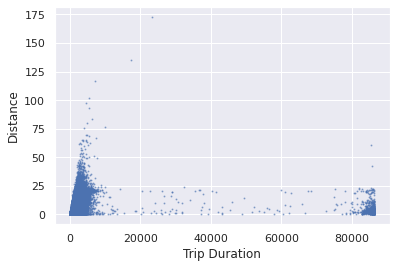

In [ ]:
plt.scatter(df.trip_duration, df.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

#There are lots of trips which covered negligible distance but clocked more than 20,000 seconds in terms of the Duration.
#Initially there is some proper correlation between the distance covered and the trip duration in the graph. but later on it all seems uncorrelated.
#There were few trips which covered huge distance of approx 200 kms within very less time frame, which is unlikely and should be treated as outliers.

In [ ]:
#Plotting graph area where distance is < 50 km and duration is < 1000 seconds

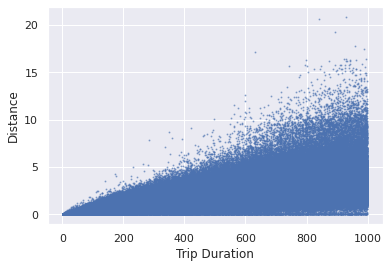

In [ ]:
dur_dist = df.loc[(df.distance < 50) & (df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which showcase many trips with the inconsistent readings.

We should remove those trips which covered 0 km distance but clocked more than 1 minute to make our data more consistent for predictive model. Because if the trip was cancelled after booking, than that should not have taken more than a minute time. 

In [ ]:
df = df[~((df.distance == 0) & (df.trip_duration >= 60))]

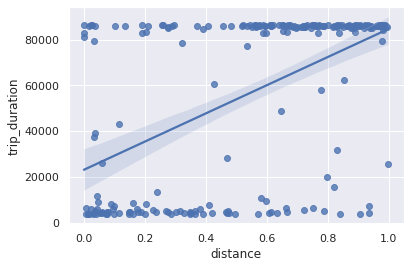

In [ ]:
#Now, Instead of looking at each and every trip, we should approximate and try to
#filter those trips which covered less than 1 km distance and but clocked more than an hour.
duo = df.loc[(df['distance'] <= 1) & (df['trip_duration'] >= 3600),['distance','trip_duration']].reset_index(drop=True)

sns.regplot(duo.distance, duo.trip_duration)
plt.show()

Though the straight line tries to show some linear relation between the two. But there seems to be negligible correlation between these two metric as seen from the scatter plot where it should have been a linear distribution.
It is rarely occurs that customer keep sitting in the taxi for more than an hour and it does not travel for even 1 km.
These should be removed to bring in more consistency to our results.

In [ ]:
df = df[~((df['distance'] <= 1) & (df['trip_duration'] >= 3600))]

Average speed per hour

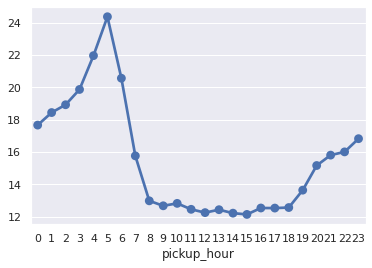

In [ ]:
group9 = df.groupby('pickup_hour').speed.mean()
sns.pointplot(group9.index, group9.values)
plt.show()

The average trend is totally inline with the normal circumstances.
Average speed tend to increase after late evening and continues to increase gradually till the late early morning hours.
Average taxi speed is highest at 5 AM in the morning, then it declines steeply as the office hours approaches.
Average taxi speed is more or less same during the office hours i.e. from 8 AM till 6PM in the evening.

Average speed per weekday

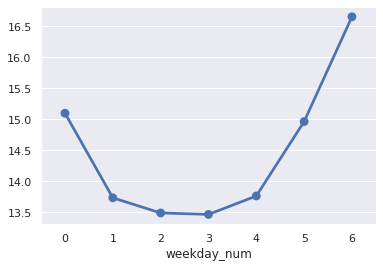

In [ ]:
group10 = df.groupby('weekday_num').speed.mean()
sns.pointplot(group10.index, group10.values)
plt.show()

Average taxi speed is higher on weekend as compared to the weekdays which is obvious when there is mostly rush of office goers and business owners.
Even on monday the average taxi speed is shown higher which is quite surprising when it is one of the most busiest day after the weekend. There can be several possibility for such behaviour

Passenger count per vendor

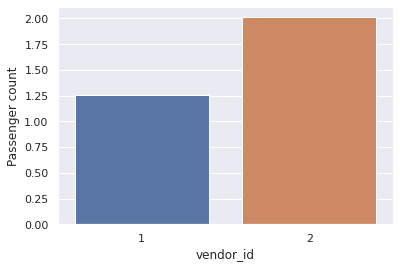

In [ ]:
group9 = df.groupby('vendor_id').passenger_count.mean()
sns.barplot(group9.index, group9.values)
plt.ylabel('Passenger count')
plt.show()

Clear difference between the two operators for the average passenger count in all trips. It seems that vendor 2 trips generally consist of 2 passengers as compared to the vendor 1 with 1 passenger. Let's bifurcate it further.

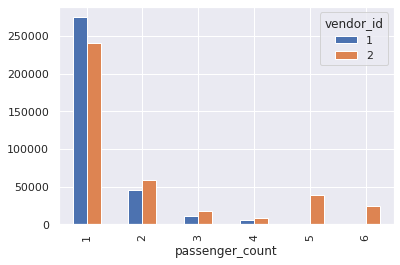

In [ ]:
df.groupby('passenger_count').vendor_id.value_counts().reset_index(name='count').pivot("passenger_count","vendor_id","count").plot(kind='bar')
plt.show()

It seems that most of the big cars are served by the Vendor 2 including minivans because other than passenger 1, vendor 2 has majority in serving more than 1 passenger count and that explains it greater share of the market

Distance per passenger count Analysis

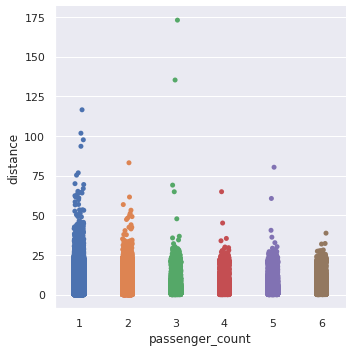

In [ ]:
sns.catplot(y='distance',x='passenger_count',data=df,kind="strip")
#Longer distances are covered by either 1 or 2 passenger

Distance per day of week Analysis

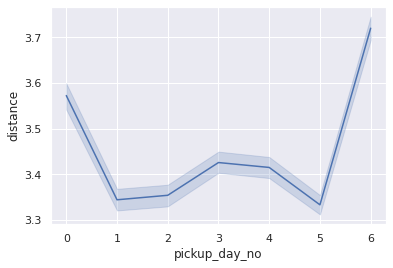

In [ ]:
sns.lineplot(x='pickup_day_no',y='distance',data=df)

#Distances are longer on Sundays probably because it’s weekend.
#Monday trip distances are also quite high.
#This probably means that there can be outstation trips on these days and/or the streets are busier

Distance per hour of day Analysis

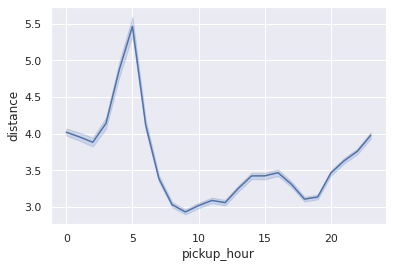

In [ ]:
sns.lineplot(x='pickup_hour',y='distance',data=df)

#Distances are the longest around 5 am.

Distance per time of day Analysis

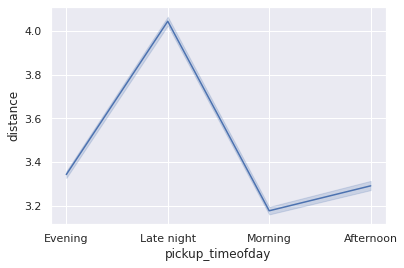

In [ ]:
sns.lineplot(x='pickup_timeofday',y='distance',data=df)

#As seen above also, distances being the longest during late night or it maybe called as early morning too.
#This can probably point to outstation trips where people start early for the day

Distance per month Analysis

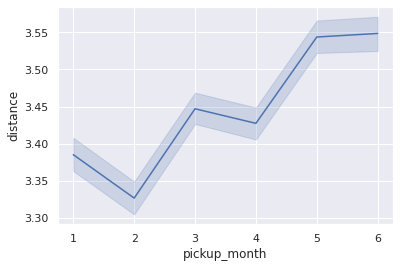

In [ ]:
sns.lineplot(x='pickup_month',y='distance',data=df)

#As we also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June.

Passenger Count and Vendor id Analysis

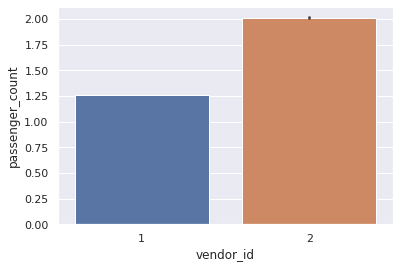

In [ ]:
sns.barplot(y='passenger_count',x='vendor_id',data=df)

#This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

Trip Duration and Distance Analysis

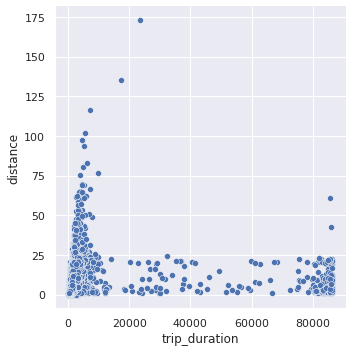

In [ ]:
sns.relplot(y=df.distance,x='trip_duration',data=df)


#We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

Co-Ordinate Analysis

Text(0.5, 1.0, 'The distribution of pickup_latitude')

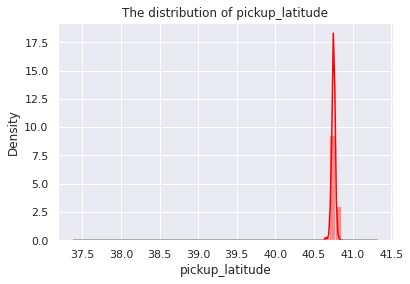

In [ ]:
sns.distplot(df['pickup_latitude'], color ='red')
plt.title('The distribution of pickup_latitude')

Text(0.5, 1.0, 'The distribution of pickup_longitude')

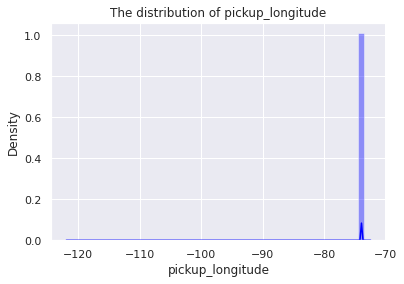

In [ ]:
sns.distplot(df['pickup_longitude'], color ='blue')
plt.title('The distribution of pickup_longitude')

Text(0.5, 1.0, 'The distribution of dropoff_latitude')

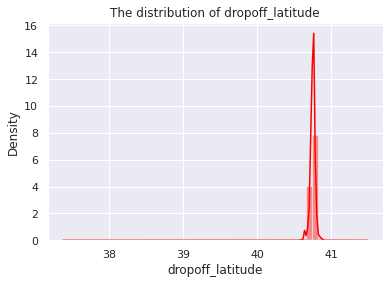

In [ ]:
sns.distplot(df['dropoff_latitude'], color ='red')
plt.title('The distribution of dropoff_latitude')

Text(0.5, 1.0, 'The distribution of dropoff_longitude')

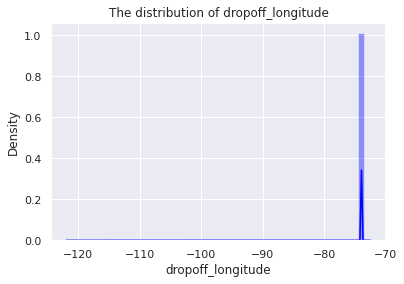

In [ ]:
sns.distplot(df['dropoff_longitude'], color ='blue')
plt.title('The distribution of dropoff_longitude')

Map Visualization

Visualizing the Taxi pickup locations by placing long and lat marker on the MAP of the US. So that we can analyze below questions:

Are all pickups constrained to NYC and it's surrounding areas?
Is there any unusual location of the pickup?
Are the lat long constrained to the land area of the US and nowhere else?

In [ ]:
#!pip install basemap

from mpl_toolkits.basemap import Basemap
def map_marker(set):
    # Import package for map
    from mpl_toolkits.basemap import Basemap
    plt.figure(figsize = (20,20))

    # Set the limits of the map to the minimum and maximum coordinates
    lat_min = df["pickup_latitude"].min() - .2
    lat_max = df["pickup_latitude"].max() + .2
    lon_min = df["pickup_longitude"].min() - .2
    lon_max = df["pickup_longitude"].max() + .2

    # Set the center of the map
    cent_lat = (lat_min + lat_max) / 2
    cent_lon = (lon_min + lon_max) / 2

    #Create the Basemap object with required params.
    map = Basemap(llcrnrlon=lon_min,
                  llcrnrlat=lat_min,
                  urcrnrlon=lon_max,
                  urcrnrlat=lat_max,
                  resolution='l',
                  projection='tmerc',
                  lat_0 = cent_lat,
                  lon_0 = cent_lon)

    #Style the map
    map.drawmapboundary()
    map.drawcoastlines()
    map.fillcontinents()
    map.drawcountries(linewidth=2)
    map.drawstates()


    #Fetch the long and lat in form of array
    long = np.array(df["pickup_longitude"])
    lat = np.array(df["pickup_latitude"])

    x, y = map(long, lat)
    map.plot(x, y,'ro', markersize=2, alpha=1)

    plt.show()

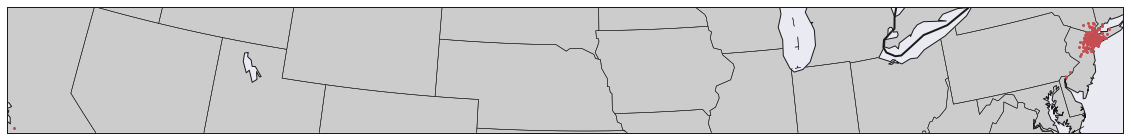

In [ ]:
map_marker(df)

Were there more than one pickups in the CA or the data is still not filtered

In [ ]:
df[df.pickup_longitude == df.pickup_longitude.min()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9,log_trip_duration
421819,id2854272,2,2016-02-26 13:50:19,2016-02-26 13:58:38,2,-121.933342,37.389381,-121.933304,37.389511,N,...,0,0,1,0,0,0,0,0,0,6.214608


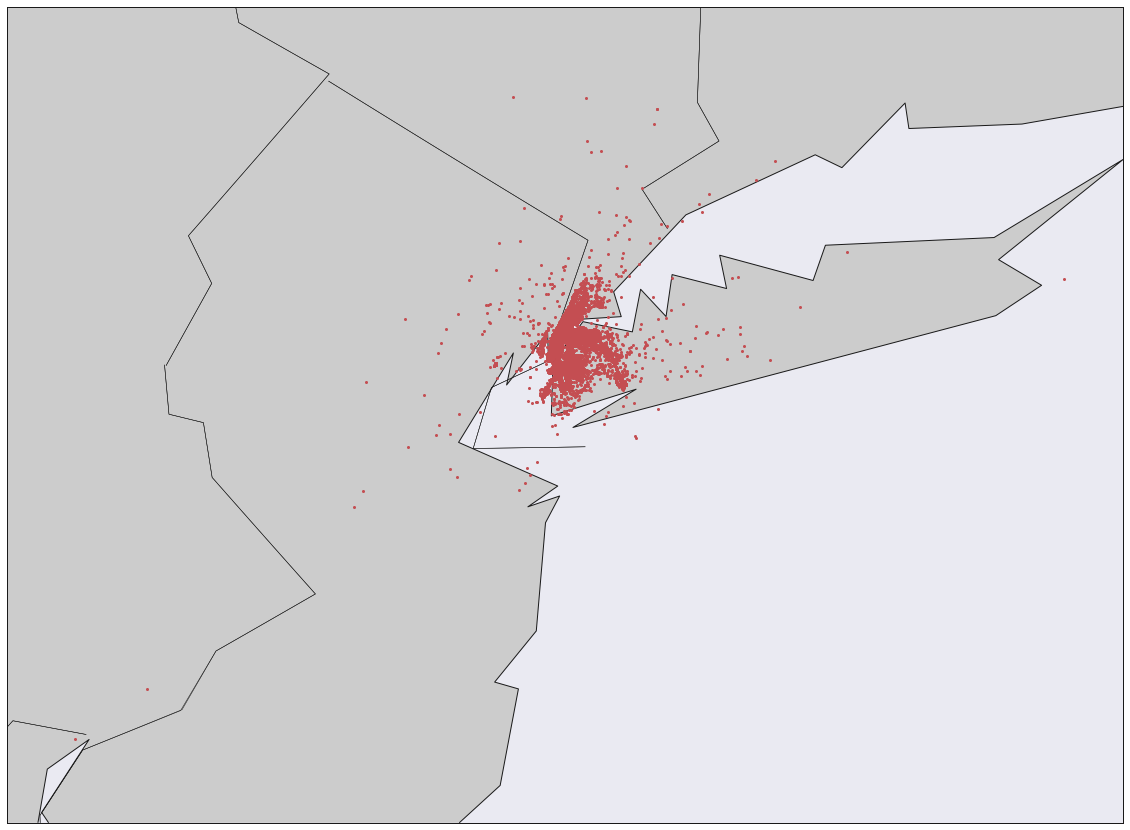

In [ ]:
df = df[df.pickup_longitude != df.pickup_longitude.min()]
map_marker(df)

There are quite a few pickups being shown off the NYC coast i.e. in the Atlantic ocean.

Now most of the pickups are being shown in and around NYC area.

It would be cumbersome to track them and remove. We can ignore them as of now to focus more on NYC pickups.

NYC pickup locations

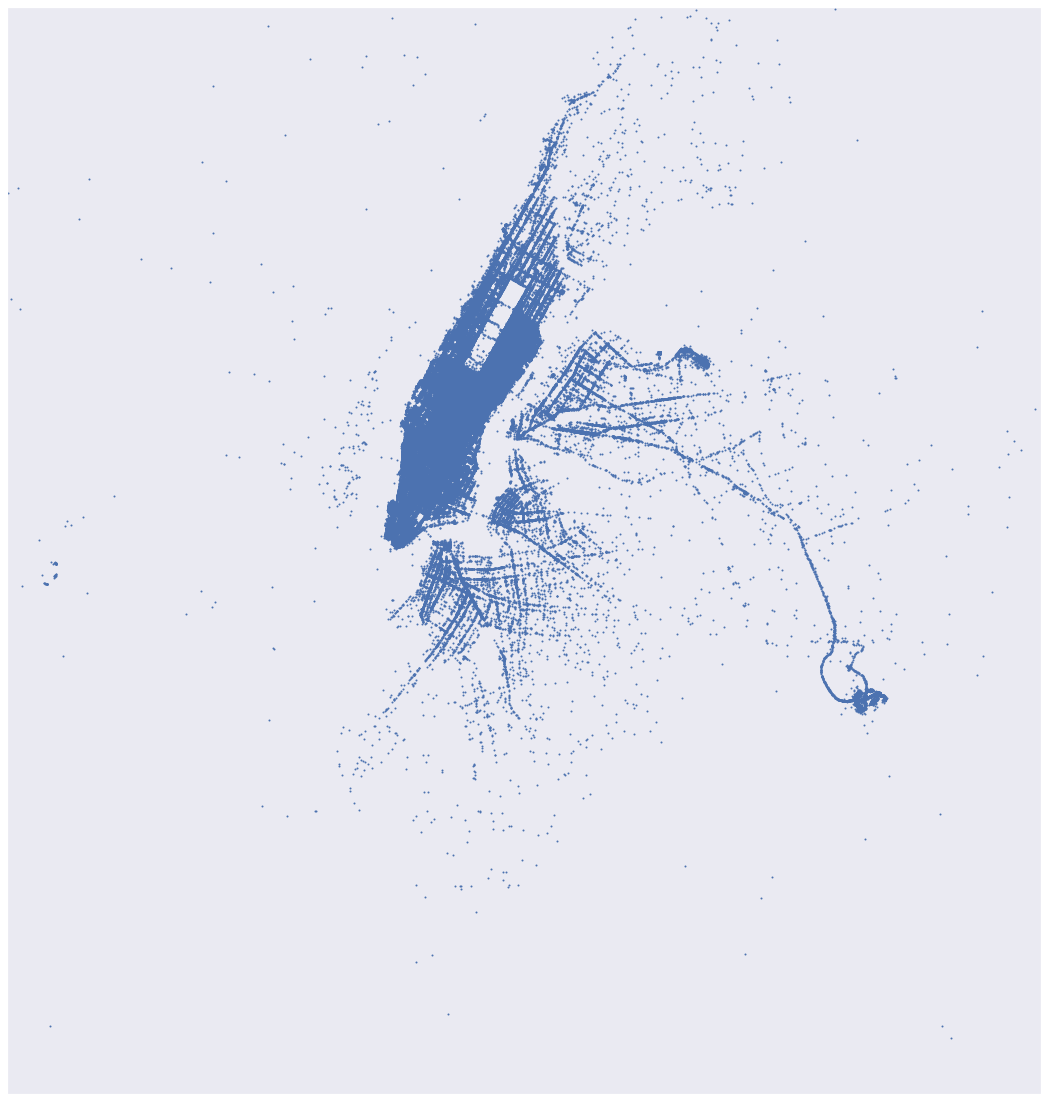

In [ ]:
plt.figure(figsize=(20,20))
from mpl_toolkits.basemap import Basemap

# Set the limits of the map to the minimum and maximum coordinates
lat_min = 40.5
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

# Set the center of the map
cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

#Create the Basemap object with required params.
map = Basemap(llcrnrlon=lon_min,
              llcrnrlat=lat_min,
              urcrnrlon=lon_max,
              urcrnrlat=lat_max,
              resolution='l',
              projection='tmerc',
              lat_0 = cent_lat,
              lon_0 = cent_lon)

#Style the map
# map.drawcounties()

#Fetch the long and lat in form of array
long = np.array(df["pickup_longitude"])
lat = np.array(df["pickup_latitude"])

x, y = map(long, lat)
map.plot(x, y,'bo', markersize=1, alpha=1)
plt.xticks()
plt.show()

We can see that most of the taxi pickups were done in the manhattan area as compared to the other areas in NYC.
A long trail towards the airport shows that the airport is situated quite far from the Manhattan area

NYC dropoff locations

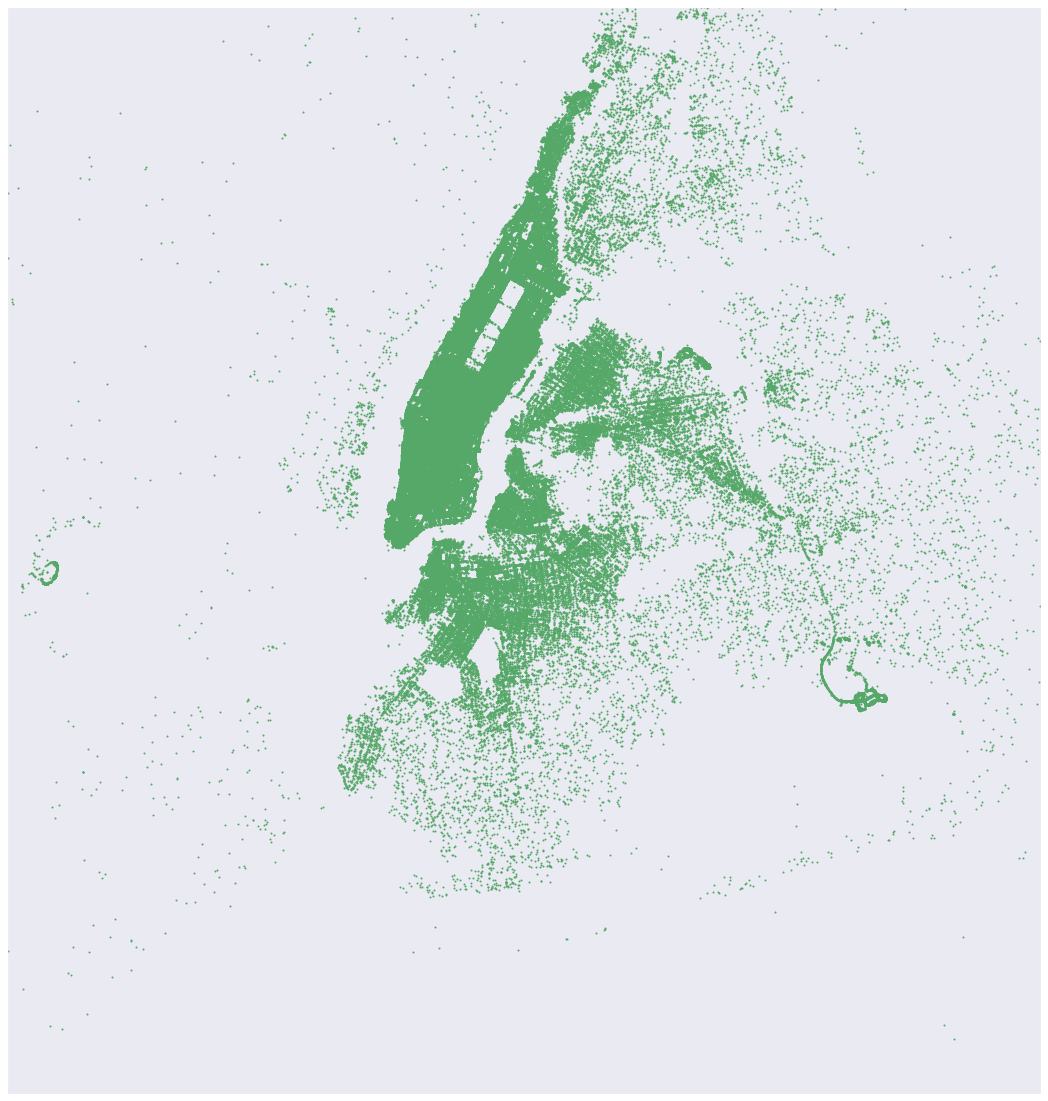

In [ ]:
plt.figure(figsize=(20,20))

# Set the limits of the map to the minimum and maximum coordinates
lat_min = 40.5
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

# Set the center of the map
cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

#Create the Basemap object with required params.
map = Basemap(llcrnrlon=lon_min,
              llcrnrlat=lat_min,
              urcrnrlon=lon_max,
              urcrnrlat=lat_max,
              resolution='l',
              projection='tmerc',
              lat_0 = cent_lat,
              lon_0 = cent_lon)

#Style the map
# map.drawcounties()

#Fetch the long and lat in form of array
long = np.array(df["dropoff_longitude"])
lat = np.array(df["dropoff_latitude"])

x, y = map(long, lat)
map.plot(x, y,'go', markersize=1, alpha=1)
plt.xticks()
plt.show()

Dropoff's are much more distributed around the NYC area where still most of the dropoff's were done in the Manhattan

Feature Engineering

Feature Selection
Intuition
Using backward elimination technique to select the best features to train our model.
It displays some statistical metrics with there significance value.
Like, It shows the p values for each feature as per its significance in the whole dataset.
It also shows the adjusted R squared values to identify whether removing or selecting the feature is beneficial or not.
Looking at the P and adjusted R squared value to decide which features to keep and which needed to be removed.
Assigning the values to X & Y array from the dataset.

In [ ]:
#First chech the index of the features and label
list(zip( range(0,len(df.columns)),df.columns))

[(0, 'id'),
 (1, 'vendor_id'),
 (2, 'pickup_datetime'),
 (3, 'dropoff_datetime'),
 (4, 'passenger_count'),
 (5, 'pickup_longitude'),
 (6, 'pickup_latitude'),
 (7, 'dropoff_longitude'),
 (8, 'dropoff_latitude'),
 (9, 'store_and_fwd_flag'),
 (10, 'trip_duration'),
 (11, 'pickup_day'),
 (12, 'dropoff_day'),
 (13, 'pickup_day_no'),
 (14, 'dropoff_day_no'),
 (15, 'pickup_hour'),
 (16, 'dropoff_hour'),
 (17, 'pickup_month'),
 (18, 'dropoff_month'),
 (19, 'pickup_timeofday'),
 (20, 'dropoff_timeofday'),
 (21, 'distance'),
 (22, 'speed'),
 (23, 'weekday'),
 (24, 'month'),
 (25, 'weekday_num'),
 (26, 'flag_Y'),
 (27, 'vendor_id_2'),
 (28, 'month_2'),
 (29, 'month_3'),
 (30, 'month_4'),
 (31, 'month_5'),
 (32, 'month_6'),
 (33, 'weekday_num_1'),
 (34, 'weekday_num_2'),
 (35, 'weekday_num_3'),
 (36, 'weekday_num_4'),
 (37, 'weekday_num_5'),
 (38, 'weekday_num_6'),
 (39, 'pickup_hour_1'),
 (40, 'pickup_hour_2'),
 (41, 'pickup_hour_3'),
 (42, 'pickup_hour_4'),
 (43, 'pickup_hour_5'),
 (44, 'pickup_

In [ ]:
Y = df.iloc[:,10].values
X = df.iloc[:,range(15,61)].values

In [ ]:
print("Appending {} rows of 1's as the first column in the X array".format(X.shape[0]))

Appending 726886 rows of 1's as the first column in the X array


In [ ]:
X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)

In [ ]:
X1.shape

(726886, 47)

Algorithm

In [ ]:
# Check for categorical variables
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday', 'distance',
       'speed', 'weekday', 'month', 'weekday_num', 'flag_Y', 'vendor_id_2',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'weekday_num_1',
       'weekday_num_2', 'weekday_num_3', 'weekday_num_4', 'weekday_num_5',
       'weekday_num_6', 'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3',
       'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7',
       'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11',
       'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15',
       'pickup_hour_16', 'pickup_hour_17', 'p

In [ ]:
# Encode categorical variables
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N':0,'Y':1})

In [ ]:
# Remove unnecessary features
df.drop(['id', 'pickup_datetime', 'dropoff_datetime',
       'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'dropoff_hour',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday', 'distance',
       'speed', 'month','flag_Y',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'weekday_num_1',
       'weekday_num_2', 'weekday_num_3', 'weekday_num_4', 'weekday_num_5',
       'weekday_num_6', 'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3',
       'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7',
       'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11',
       'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15',
       'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18', 'pickup_hour_19',
       'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22', 'pickup_hour_23',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'passenger_count_7', 'log_trip_duration'], 
                axis = 1, inplace = True)

In [ ]:
df.drop(['vendor_id_2'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_month', 'weekday',
       'weekday_num', 'passenger_count_9'],
      dtype='object')

In [ ]:
# Split
# Create matrix of features
X = df[['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag','pickup_month', 'pickup_hour',
       'weekday_num']] # double brackets! #pickup_weekday = weekday

# Create array of target variable 
y = df['trip_duration']

# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Multivariate Linear Regression

In [ ]:
#  Import model
from sklearn.linear_model import LinearRegression

#  Instantiate model object
lreg = LinearRegression()

# Fit to training data
lreg.fit(X_train,y_train)
print(lreg)

# Predict
y_pred_lreg = lreg.predict(X_test)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg)))

LinearRegression()

Linear Regression Performance Metrics
R^2= 0.013585446962037673
MAE: 547.4293569808292
MSE: 8489097.667008506
RMSE: 2913.605612811814


Decision Tree

In [ ]:
# Fit
# Import model
from sklearn.tree import DecisionTreeRegressor

# Instantiate model object
dtree = DecisionTreeRegressor()

# Fit to training data
dtree.fit(X_train,y_train)
print(dtree)

# Predict
y_pred_dtree = dtree.predict(X_test)

# Score It
from sklearn import metrics
print('\nDecision Tree Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_dtree))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_dtree))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_dtree))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtree)))

DecisionTreeRegressor()

Decision Tree Regression Performance Metrics
R^2= -1.1240467235344789
MAE: 494.52434343573304
MSE: 18280610.243045714
RMSE: 4275.583029604935


Random Forest

In [ ]:
# Fit 
# Import model
from sklearn.ensemble import RandomForestRegressor 

# Instantiate model object
rforest = RandomForestRegressor(n_estimators = 20, n_jobs = -1)

# Fit to training data
rforest = rforest.fit(X_train,y_train)
print(rforest)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
from sklearn import metrics
print('\nRandom Forest Regression Performance Metrics')
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))

RandomForestRegressor(n_estimators=20, n_jobs=-1)

Random Forest Regression Performance Metrics
R^2 = -0.04272522688657987
MAE 398.69404569303407
MSE 8974234.423478456
RMSE 2995.702659390357
